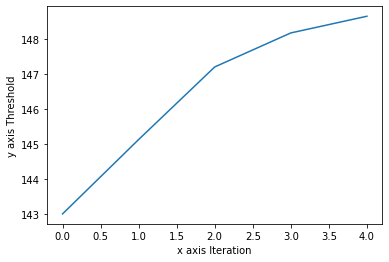

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 15 23:05:46 2020

@author: 
"""

#......IMPORT .........
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

img=cv2.imread("Sample_Rice_Image/rice_img2.png",0)
def task1(img):
    e=0.001
    t = random.randint(0,255)
    #t = 30
    time = 0
    t_l=[]
    time_l=[]
    while True:
        t_l.append(t)
        time_l.append(time)
        bi = img >= t
        bi_inv = img < t
        fore_pix = np.sum(bi)
        back_pix = np.sum(bi_inv)
        w0 = fore_pix / img.size
        u0 = np.sum(img*bi) / fore_pix
        w1 = back_pix / img.size
        u1 = np.sum(img*bi_inv) / back_pix
        if abs(t - (u0+u1)/2) <= e:
            break
        else:
            t = (u0+u1)/2
        time = time + 1
    plt.xlabel('x axis Iteration')
    plt.ylabel('y axis Threshold')
    plt.plot(time_l,t_l)
    plt.show()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] >= t:
                img[i][j] = 255
            else:
                img[i][j] = 0
    #ret,thresh = cv2.threshold(img,t,255,cv2.THRESH_BINARY)
    return img,t
    
img,t = task1(img)    
    
    

def task2(img):
    new_img = []
    for i in range(img.shape[0]+4):
        new_img.append([])
        for j in range(img.shape[1]+4):
            new_img[i].append(0)
    new_img = np.array(new_img,dtype = np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i+2][j+2] = img[i][j]
    #for i in range(3,10,2)
    # median filter
    c = copy.copy(new_img)
    for i in range(2,new_img.shape[0]-2):
        for j in range(2,new_img.shape[1]-2):
            a = sorted([c[i-2][j-2],c[i-2][j-1],c[i-2][j],c[i-2][j+1],c[i-2][j+2],
                        c[i-1][j-2],c[i-1][j-1],c[i-1][j],c[i-1][j+1],c[i-1][j+2],
                        c[i][j-2],c[i][j-1],c[i][j],c[i][j+1],c[i][j+2],
                        c[i+1][j-2],c[i+1][j-1],c[i+1][j],c[i+1][j+1],c[i+1][j+2],
                        c[i+2][j-2],c[i+2][j-1],c[i+2][j],c[i+2][j+1],c[i+2][j+2]])
            new_img[i][j] = a[12]

   # First pass
    img_c = copy.copy(new_img)
    t = 1
    d = {}
    d[t] = t
    for i in range(1,img_c.shape[0]-1):
        for j in range(1,img_c.shape[1]-1):
#             if img_c[i][j] > 0:
#                 img_c[i][j]=t
#     for i in range(1,img_c.shape[0]-1):
#         for j in range(1,img_c.shape[1]-1):
            if img_c[i][j] > 0:
                if img_c[i-1][j-1] > 0 or img_c[i-1][j] > 0 or img_c[i-1][j+1] > 0 or img_c[i][j-1] > 0:
                    a = [img_c[i-1][j-1],img_c[i-1][j],img_c[i-1][j+1],img_c[i][j-1]]
                    a = [k for k in a if k > 0]
                    img_c[i][j] = min(a)
                else:
                    img_c[i][j] = t
                    t = t + 1
                    d[t] = t
    for i in range(1,img_c.shape[0]-1):
        for j in range(1,img_c.shape[1]-1):
            if img_c[i][j] > 0:
                a = [img_c[i-1][j-1],img_c[i-1][j],img_c[i-1][j+1],
                     img_c[i][j-1],img_c[i][j],img_c[i][j+1],
                     img_c[i+1][j-1],img_c[i+1][j],img_c[i+1][j+1],d[img_c[i][j]]]
                d[img_c[i][j]] = min([k for k in a if k > 0])
    new_d = dict()
    for keys,values in d.items():
        new_d[values] = []
    for keys,values in d.items():
        new_d[values].append(keys)
    key = sorted(new_d.keys())
    key.reverse()
    for i in key:
        for j in new_d[i]:
            if j != i and j in new_d.keys():
                new_d[i].extend(new_d.pop(j))
                
    nums = len(new_d) - 1
    
    
    
    return new_img,nums 
    
    
    

#def task3():
    
    
    
    

    
my_parser = argparse.ArgumentParser()
my_parser.add_argument('-o','--OP_folder', type=str,help='Output folder name', default = 'OUTPUT')
#my_parser.add_argument('-m','--min_area', type=int,action='store', required = True, help='Minimum pixel area to be occupied, to be considered a whole rice kernel')
my_parser.add_argument('-f','--input_filename', type=str,action='store', required = True, help='Filename of image ')
# Execute parse_args()
args = my_parser.parse_args()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [96]:
img=cv2.imread("Sample_Rice_Images_Updated/rice_img7.png",0)

In [33]:
img = cv2.putText(img,'3333',(0,0),cv2.FONT_HERSHEY_SIMPLEX,3,(255,255,255),2)

In [23]:
img=cv2.imread("good.png",0)

In [3]:
img

In [38]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [97]:
def otsu(img):
    e=0.001
    t = random.randint(0,255)
    #t = 30
    time = 0
    t_l=[]
    time_l=[]
    while True:
        t_l.append(t)
        time_l.append(time)
        bi = img >= t
        bi_inv = img < t
        fore_pix = np.sum(bi)
        back_pix = np.sum(bi_inv)
        if fore_pix == 0:
            break
        if back_pix == 0:
            continue
        w0 = fore_pix / img.size
        u0 = np.sum(img*bi) / fore_pix
        w1 = back_pix / img.size
        u1 = np.sum(img*bi_inv) / back_pix
        if abs(t - (u0+u1)/2) <= e:
            break
        else:
            t = (u0+u1)/2
        time = time + 1
#     plt.xlabel('x axis Iteration')
#     plt.ylabel('y axis Threshold')
#     plt.plot(time_l,t_l)
#     plt.show()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] >= t:
                img[i][j] = 0
            else:
                img[i][j] = 255
    #ret,thresh = cv2.threshold(img,t,255,cv2.THRESH_BINARY)
    return img,t,time_l,t_l

In [98]:
img,t,x,y = otsu(img)

In [59]:
x

[0, 1, 2, 3, 4, 5]

In [44]:
type(int(y[1]))

int

In [ ]:
c=[]
for i in range(len(x,y)):
    

In [64]:
for xy in zip(x, y):
    print(xy[1])

244
173.9901634718366
152.81450139990412
150.28308300744357
149.4334029516252
149.05691504202494


In [46]:
for i in range(len(y)):
    y[i] = round(y[i],2)

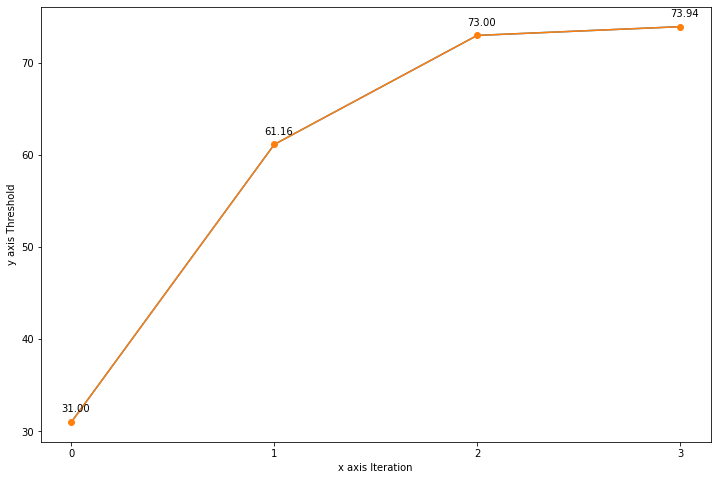

In [99]:
plt.figure(figsize = (12,8))
plt.xlabel('x axis Iteration')
plt.ylabel('y axis Threshold')
plt.plot(x, y)
plt.xticks(range(len(x)))
#for i in y:
plt.plot(x,y,marker='o')
for xy in zip(x,y):
    plt.annotate('%.2f'%xy[1],xy=xy,xytext=(-10, 10),textcoords='offset points ')
#plt.savefig(o0)
plt.show()

In [114]:
x

[0, 1, 2, 3]

In [39]:
t

148.6570737327494

In [42]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [101]:
i = cv2.medianBlur(img,5)

In [19]:
t

148.6570737327494

In [3]:
a = []
for i in range(50):
    a.append([])
    for j in range(50):
        a[i].append(0)
a[2][2]=255
a[2][3]=255
a[3][3]=255
a[4][3]=255
a[2][4]=255
a[2][5]=255
#a[2][4]=255
a[2][5]=255
a = np.array(a,dtype = np.uint8)
a.shape[1]
print(type(a))
a

<class 'numpy.ndarray'>


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [50]:
a

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
new_img = []
for i in range(img.shape[0]+4):
    new_img.append([])
    for j in range(img.shape[1]+4):
        new_img[i].append(0)
new_img = np.array(new_img,dtype = np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i+2][j+2] = img[i][j]
for i in range
print(new_img.shape,img.shape)

(804, 604) (800, 600)


In [29]:
def task2(img):
    new_img = []
    for i in range(img.shape[0]+4):
        new_img.append([])
        for j in range(img.shape[1]+4):
            new_img[i].append(255)
    new_img = np.array(new_img,dtype = np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i+2][j+2] = img[i][j]
    #for i in range(3,10,2)
    # median filter
    c = copy.copy(new_img)
    for i in range(2,new_img.shape[0]-2):
        for j in range(2,new_img.shape[1]-2):
            a = sorted([c[i-2][j-2],c[i-2][j-1],c[i-2][j],c[i-2][j+1],c[i-2][j+2],
                        c[i-1][j-2],c[i-1][j-1],c[i-1][j],c[i-1][j+1],c[i-1][j+2],
                        c[i][j-2],c[i][j-1],c[i][j],c[i][j+1],c[i][j+2],
                        c[i+1][j-2],c[i+1][j-1],c[i+1][j],c[i+1][j+1],c[i+1][j+2],
                        c[i+2][j-2],c[i+2][j-1],c[i+2][j],c[i+2][j+1],c[i+2][j+2]])
            new_img[i][j] = a[12]

   # First pass
    img_c = copy.copy(new_img)
    t = 1
    d = {}
    d[t] = t
    for i in range(1,img_c.shape[0]-1):
        for j in range(1,img_c.shape[1]-1):
#             if img_c[i][j] > 0:
#                 img_c[i][j]=t
#     for i in range(1,img_c.shape[0]-1):
#         for j in range(1,img_c.shape[1]-1):
            if img_c[i][j] < 255:
                if img_c[i-1][j-1] < 255 or img_c[i-1][j] < 255 or img_c[i-1][j+1] < 255 or img_c[i][j-1] < 255:
                    a = [img_c[i-1][j-1],img_c[i-1][j],img_c[i-1][j+1],img_c[i][j-1]]
                    a = [k for k in a if k < 255]
                    img_c[i][j] = min(a)
                else:
                    img_c[i][j] = t
                    t = t + 1
                    d[t] = t

    for i in range(1,img_c.shape[0]-1):
        for j in range(1,img_c.shape[1]-1):
            if img_c[i][j] < 255:
                a = [img_c[i-1][j-1],img_c[i-1][j],img_c[i-1][j+1],
                     img_c[i][j-1],img_c[i][j],img_c[i][j+1],
                     img_c[i+1][j-1],img_c[i+1][j],img_c[i+1][j+1],d[img_c[i][j]]]
                d[img_c[i][j]] = min([k for k in a if k < 255])
    new_d = dict()
    for keys,values in d.items():
        new_d[values] = []
    for keys,values in d.items():
        new_d[values].append(keys)
    key = sorted(new_d.keys())
    key.reverse()
    for i in key:
        for j in new_d[i]:
            if j != i and j in new_d.keys():
                new_d[i].extend(new_d.pop(j))
    new_d.pop(sorted(new_d.keys())[-1])            
    nums = len(new_d)
    
    
    
    return new_img,nums,new_d,img_c

In [30]:
a,b,c,d = task2(img)

In [99]:
a.shape

(804, 604)

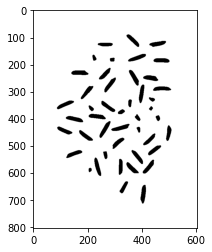

In [8]:
plt.imshow(a,cmap='gray')
plt.show()

In [9]:
b

45

In [56]:
di = {1:2,2:4}
ttt=sorted(di.keys())[-1]
di.pop(ttt)
di

{1: 2}

In [78]:
d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
c


{1: [1, 2],
 3: [3, 4, 5, 6, 7, 8, 9, 11, 13, 15],
 10: [10, 12, 14],
 16: [16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  34,
  36,
  38,
  41],
 19: [19],
 31: [31, 33, 35],
 37: [37, 39, 40],
 42: [42, 43, 44, 45, 46],
 47: [47],
 48: [48, 49, 50, 51],
 52: [52, 53, 54, 55, 56],
 57: [57, 58, 59, 60, 61, 62],
 63: [63],
 64: [64, 65, 66],
 67: [67, 68, 69, 70, 71],
 72: [72],
 73: [73, 74],
 75: [75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 91],
 77: [77],
 93: [93],
 94: [94],
 95: [95, 96, 97, 98, 100, 99],
 101: [101, 102, 104],
 103: [103, 109],
 105: [105, 106, 107, 110],
 108: [108, 111, 112, 113],
 114: [114, 115, 116, 117],
 118: [118,
  119,
  120,
  121,
  122,
  123,
  125,
  126,
  127,
  128,
  130,
  131,
  133,
  135,
  137,
  138,
  139,
  140],
 124: [124],
 129: [129],
 132: [132, 134, 136],
 141: [141],
 142: [142, 143, 144, 145, 153],
 146: [146, 147, 148, 149, 150, 151, 154, 152],
 155: [155, 156, 157

In [31]:
def task3(new_d,img_c,min_area):
    dd = dict()
    l = len(new_d)
    for key,value in new_d.items():
        dd[key] = 0
        for i in value:
            dd[key] += np.sum(img_c==i)
    s = []
    ll = []
    for key,value in dd.items():
        if dd[key] >= min_area:
            s.append(key)
    for i in s:
        ll.extend(new_d[i])
    for i in range(img_c.shape[0]):
        for j in range(img_c.shape[1]):
            if img_c[i][j] in ll:
                img_c[i][j] = 0
            else:
                img_c[i][j] = 255
    re = (l-len(s))/l
    return re,img_c,dd

In [32]:
re,im,dd = task3(c,d,250)

In [33]:
re

0.13333333333333333

In [35]:
dd

{1: 613,
 4: 769,
 9: 203,
 12: 924,
 14: 767,
 15: 213,
 18: 234,
 24: 730,
 25: 321,
 26: 981,
 37: 839,
 46: 955,
 52: 251,
 54: 812,
 55: 778,
 57: 309,
 58: 861,
 60: 918,
 64: 971,
 71: 839,
 76: 933,
 79: 136,
 81: 624,
 83: 909,
 85: 226,
 87: 847,
 88: 901,
 90: 941,
 94: 251,
 96: 730,
 98: 327,
 106: 812,
 108: 761,
 110: 841,
 112: 679,
 118: 831,
 119: 332,
 124: 145,
 126: 658,
 130: 850,
 132: 760,
 149: 835,
 151: 1011,
 154: 765,
 155: 709}

In [26]:
ll

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 12,
 13,
 14,
 16,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 35,
 39,
 42,
 44,
 32,
 34,
 36,
 41,
 43,
 48,
 37,
 38,
 40,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 78,
 75,
 76,
 77,
 81,
 82,
 83,
 84,
 87,
 89,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 105,
 102,
 104,
 106,
 107,
 108,
 109,
 111,
 115,
 117,
 116,
 110,
 112,
 113,
 114,
 118,
 119,
 120,
 121,
 122,
 123,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155]

In [107]:
round(re,2)

0.22

In [108]:
2/45

0.044444444444444446

In [104]:
s

[1,
 3,
 10,
 16,
 37,
 42,
 47,
 48,
 52,
 57,
 63,
 64,
 67,
 75,
 77,
 95,
 101,
 108,
 114,
 118,
 124,
 129,
 141,
 142,
 146,
 155,
 163,
 164,
 171,
 182,
 184,
 185,
 187,
 190,
 192]

In [105]:
ll

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 13,
 15,
 10,
 12,
 14,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 34,
 36,
 38,
 41,
 37,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 91,
 77,
 95,
 96,
 97,
 98,
 100,
 99,
 101,
 102,
 104,
 108,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 130,
 131,
 133,
 135,
 137,
 138,
 139,
 140,
 124,
 129,
 141,
 142,
 143,
 144,
 145,
 153,
 146,
 147,
 148,
 149,
 150,
 151,
 154,
 152,
 155,
 156,
 157,
 158,
 159,
 161,
 167,
 160,
 162,
 163,
 165,
 164,
 166,
 168,
 169,
 170,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 171,
 173,
 182,
 183,
 184,
 185,
 186,
 187,
 190,
 191,
 192,
 193]

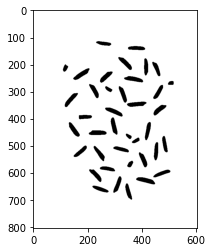

In [17]:
plt.imshow(im,cmap='gray')
plt.show()

In [28]:
def task3(c,min_a):
    

In [29]:
p = connected(a)

In [30]:
print(p)

{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7, 8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16, 17, 18, 19], 20: [20], 21: [21, 22, 24, 26, 27, 28, 29, 30], 23: [23], 25: [25], 31: [31], 32: [32, 33], 34: [34, 35, 36, 37], 38: [38, 39, 40, 41], 42: [42], 43: [43], 44: [44, 45], 46: [46, 47, 48], 49: [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], 64: [64], 65: [65, 66, 67, 68, 69, 71, 73, 77, 70, 72, 75, 80, 84, 87, 89], 74: [74, 76, 78, 79, 81, 82, 85, 88, 90, 91], 83: [83, 86], 92: [92], 93: [93, 94, 95, 96], 97: [97]}


In [140]:
print(type(img))

<class 'numpy.ndarray'>


In [126]:
key = sorted(b.keys())

key.reverse()
print(key)
for i in key:
    #print('i',i)
    for j in b[i]:
        #print('j',j)
        if j != i and j in b.keys():
            #print(b)
            #print(j,i)
            b[i].extend(b.pop(j))
print(b)
            


[157, 155, 154, 151, 149, 146, 145, 144, 143, 142, 140, 139, 138, 137, 136, 135, 134, 133, 132, 130, 127, 126, 124, 121, 120, 119, 118, 115, 113, 112, 111, 110, 109, 108, 106, 103, 102, 101, 100, 99, 98, 96, 94, 91, 90, 88, 87, 85, 83, 81, 79, 76, 74, 73, 72, 71, 69, 68, 67, 66, 65, 64, 61, 60, 58, 57, 55, 54, 52, 50, 49, 46, 43, 42, 41, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 21, 20, 19, 18, 15, 14, 12, 10, 9, 6, 5, 4, 2, 1]
{1: [1, 2, 3], 4: [4, 5, 6, 7, 8], 9: [9, 10, 11], 12: [12, 13], 14: [14, 16], 15: [15, 17], 18: [18, 19, 20, 21, 22, 23], 24: [24], 25: [25], 26: [26, 27, 28, 29, 30, 31, 33, 35, 39, 42, 44, 32, 34, 36, 41, 43, 48], 37: [37, 38, 40, 45], 46: [46, 47, 49, 50, 51], 52: [52, 53], 54: [54], 55: [55, 56], 57: [57], 58: [58, 59], 60: [60, 61, 62, 63], 64: [64, 65, 66, 67, 68, 69, 70], 71: [71, 72, 73, 74, 78, 75], 76: [76, 77], 79: [79, 80], 81: [81, 82], 83: [83, 84], 85: [85, 86], 87: [87, 89], 88: [88], 90: [90, 91, 92, 93], 94: [94, 95], 96:

In [135]:
key = sorted(b.keys())

key.reverse()
print(key)
for i in key:
    #print('i',i)
    for j in b[i]:
        #print('j',j)
        if j != i and j in b.keys():
            #print(b)
            #print(j,i)
            b[i].extend(b.pop(j))
print(b)

[157, 155, 154, 151, 149, 146, 145, 144, 143, 142, 140, 139, 138, 137, 136, 135, 134, 133, 132, 130, 127, 126, 124, 121, 120, 119, 118, 115, 113, 112, 111, 110, 109, 108, 106, 103, 102, 101, 100, 99, 98, 96, 94, 91, 90, 88, 87, 85, 83, 81, 79, 76, 74, 73, 72, 71, 69, 68, 67, 66, 65, 64, 61, 60, 58, 57, 55, 54, 52, 50, 49, 46, 43, 42, 41, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 21, 20, 19, 18, 15, 14, 12, 10, 9, 6, 5, 4, 2, 1]
{1: [1, 2, 3], 4: [4, 5, 6, 7, 8], 9: [9, 10, 11], 12: [12, 13], 14: [14, 16], 15: [15, 17], 18: [18, 19, 20, 21, 22, 23], 24: [24], 25: [25], 26: [26, 27, 28, 29, 30, 31, 33, 35, 39, 42, 44, 32, 34, 36, 41, 43, 48], 37: [37, 38, 40, 45], 46: [46, 47, 49, 50, 51], 52: [52, 53], 54: [54], 55: [55, 56], 57: [57], 58: [58, 59], 60: [60, 61, 62, 63], 64: [64, 65, 66, 67, 68, 69, 70], 71: [71, 72, 73, 74, 78, 75], 76: [76, 77], 79: [79, 80], 81: [81, 82], 83: [83, 84], 85: [85, 86], 87: [87, 89], 88: [88], 90: [90, 91, 92, 93], 94: [94, 95], 96:

In [136]:
print(len(b))

46


In [93]:
img[340:400,180:200]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [72]:
dic

{1: 1,
 2: 1,
 3: 2,
 4: 4,
 5: 4,
 6: 5,
 7: 6,
 8: 6,
 9: 9,
 10: 9,
 11: 10,
 12: 12,
 13: 12,
 14: 14,
 15: 15,
 16: 14,
 17: 15,
 18: 18,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 21,
 24: 24,
 25: 25,
 26: 26,
 27: 26,
 28: 27,
 29: 28,
 30: 28,
 31: 29,
 32: 30,
 33: 31,
 34: 32,
 35: 33,
 36: 34,
 37: 37,
 38: 37,
 39: 35,
 40: 38,
 41: 36,
 42: 39,
 43: 41,
 44: 42,
 45: 38,
 46: 46,
 47: 46,
 48: 43,
 49: 46,
 50: 49,
 51: 50,
 52: 52,
 53: 52,
 54: 54,
 55: 55,
 56: 55,
 57: 57,
 58: 58,
 59: 58,
 60: 60,
 61: 60,
 62: 61,
 63: 61,
 64: 64,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 71,
 72: 71,
 73: 71,
 74: 72,
 75: 73,
 76: 76,
 77: 76,
 78: 74,
 79: 79,
 80: 79,
 81: 81,
 82: 81,
 83: 83,
 84: 83,
 85: 85,
 86: 85,
 87: 87,
 88: 88,
 89: 87,
 90: 90,
 91: 90,
 92: 90,
 93: 91,
 94: 94,
 95: 94,
 96: 96,
 97: 96,
 98: 98,
 99: 98,
 100: 98,
 101: 99,
 102: 100,
 103: 101,
 104: 102,
 105: 103,
 106: 106,
 107: 106,
 108: 108,
 109: 108,
 110: 110,
 111: 108

In [61]:
num

7027

In [13]:
d = copy.copy(img)

In [160]:
dim = (img.shape[0]+20,img.shape[1]+20)
resized =cv2.resize(a,dim)

In [4]:
cv2.imshow('image',a)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
def task2(img):
    t = 0
    re = cv2.medianBlur(img,3)
    img = re
    # First pass
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            if img[i][j]!=255:
                if i!=0 and j!=0 and j!=img.shape[1]-1:
                    if img[i-1][j-1]!=255 or img[i-1][j]!=255 or img[i-1][j+1]!=255 or img[i][j-1]!=255:
                        a=[k for k in [img[i-1][j-1],img[i-1][j],img[i-1][j+1],img[i][j-1]]]
                        img[i][j] = min(a)
                    else:
                        img[i][j]=t
                        t=t+1
                elif i==0 and j!=0:
                    if img[i][j-1]!=255:
                        img[i][j] = img[i][j-1]
                    else:
                        img[i][j]=t
                        t=t+1
                elif i==0 and j==0:
                    img[i][j]=t
                    t=t+1
                elif i!=0 and j==0:
                    if img[i-1][j]!=255 or img[i-1][j+1]!=255:
                        a = [k for k in [img[i-1][j],img[i-1][j+1]]]
                        img[i][j] = min(a)
                    else:
                        img[i][j]=t
                        t=t+1
                elif i!=0 and j==img.shape[1]-1:
                    if img[i-1][j-1]!=255 or img[i-1][j]!=255 or img[i][j-1]!=255:
                        a = [k for k in [img[i-1][j-1],img[i-1][j],img[i][j-1]]]
                        img[i][j]=min(a)
                    else:
                        img[i][j]=t
                        t=t+1
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]!=255:
                if i!=0 and j!=0 and i!=img.shape[0]-1 and j!=img.shape[1]-1:
                    a=[k for k in [img[i-1][j-1],img[i-1][j],img[i-1][j+1],img[i][j-1],img[i][j],img[i][j+1],img[i+1][j-1],img[i+1][j],img[i+1][j+1]]]
                    img[i][j]=min(a)
                elif i==0 and j==0:
                    img[0][0] = min([img[0][0],img[0][1],img[1][0],img[1][1]])
                elif i==0 and j==img.shape[1]-1:
                    img[i][j]=min([img[i][j-1],img[i][j],img[i+1][j-1],img[i+1][j]])
                elif i==0 and j!=0 and j!=img.shape[1]-1:
                    img[i][j]=min([img[i][j-1],img[i][j],img[i][j+1],img[i+1][j-1],img[i+1][j],img[i+1][j+1]])
                elif i==img.shape[0]-1 and j==0:
                    img[i][j]=min([img[i-1][j],img[i-1][j+1],img[i][j],img[i][j+1]])
                elif i==img.shape[0]-1 and j==img.shape[1]-1:
                    img[i][j]=min([img[i-1][j-1],img[i-1][j],img[i][j-1],img[i][j]])
                elif i==img.shape[0]-1 and j!=0 and j!=img.shape[1]-1:
                    img[i][j]=min([img[i-1][j-1],img[i-1][j],img[i-1][j+1],img[i][j-1],img[i][j],img[i][j+1]])
                elif i!=0 and i!=img.shape[0]-1 and j==0:
                    img[i][j]=min([img[i-1][j],img[i-1][j+1],img[i][j],img[i][j+1],img[i+1][j],img[i+1][j+1]])
                elif i!=0 and i!=img.shape[0]-1 and j==img.shape[1]-1:
                    img[i][j]=min([img[i-1][j-1],img[i-1][j],img[i][j-1],img[i][j],img[i+1][j-1],img[i+1][j]])
    # Second pass
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]!=255:
                if i!=0 and j!=0 and i!=img.shape[0]-1 and j!=img.shape[1]-1:
                    a=[k for k in [img[i-1][j-1],img[i-1][j],img[i-1][j+1],img[i][j-1],img[i][j],img[i][j+1],img[i+1][j-1],img[i+1][j],img[i+1][j+1]]]
                    img[i][j]=min(a)
                elif i==0 and j==0:
                    img[0][0] = min([img[0][0],img[0][1],img[1][0],img[1][1]])
                elif i==0 and j==img.shape[1]-1:
                    img[i][j]=min([img[i][j-1],img[i][j],img[i+1][j-1],img[i+1][j]])
                elif i==0 and j!=0 and j!=img.shape[1]-1:
                    img[i][j]=min([img[i][j-1],img[i][j],img[i][j+1],img[i+1][j-1],img[i+1][j],img[i+1][j+1]])
                elif i==img.shape[0]-1 and j==0:
                    img[i][j]=min([img[i-1][j],img[i-1][j+1],img[i][j],img[i][j+1]])
                elif i==img.shape[0]-1 and j==img.shape[1]-1:
                    img[i][j]=min([img[i-1][j-1],img[i-1][j],img[i][j-1],img[i][j]])
                elif i==img.shape[0]-1 and j!=0 and j!=img.shape[1]-1:
                    img[i][j]=min([img[i-1][j-1],img[i-1][j],img[i-1][j+1],img[i][j-1],img[i][j],img[i][j+1]])
                elif i!=0 and i!=img.shape[0]-1 and j==0:
                    img[i][j]=min([img[i-1][j],img[i-1][j+1],img[i][j],img[i][j+1],img[i+1][j],img[i+1][j+1]])
                elif i!=0 and i!=img.shape[0]-1 and j==img.shape[1]-1:
                    img[i][j]=min([img[i-1][j-1],img[i-1][j],img[i][j-1],img[i][j],img[i+1][j-1],img[i+1][j]])
    nums = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] not in nums and img[i][j] != 255:
                nums.append(img[i][j])
    
    
    
    return re,len(nums)                        
#img = task2(img)

In [24]:
a,b=task2(img)

In [25]:
b

37

In [24]:
cv2.imshow('image',a)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def task3(img,min_area):
    